In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [189]:
%%R
library(mlbench)
data(BreastCancer)

In [190]:
Breast_Cancer_R_df = ro.r['BreastCancer']
with(ro.default_converter + pandas2ri.converter).context():
    Breast_Cancer_PANDAS_df = ro.conversion.get_conversion().rpy2py(Breast_Cancer_R_df)
Breast_Cancer_PANDAS_df

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,benign
2,1002945,5,4,4,5,7,10,3,2,1,benign
3,1015425,3,1,1,1,2,2,3,1,1,benign
4,1016277,6,8,8,1,3,4,3,7,1,benign
5,1017023,4,1,1,3,2,1,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...,...
695,776715,3,1,1,1,3,2,1,1,1,benign
696,841769,2,1,1,1,2,1,1,1,1,benign
697,888820,5,10,10,3,7,3,8,10,2,malignant
698,897471,4,8,6,4,3,4,10,6,1,malignant


In [191]:
Breast_Cancer_PANDAS_df.isna().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [192]:
Breast_Cancer_PANDAS_df['Bare.nuclei'] = pd.to_numeric(Breast_Cancer_PANDAS_df['Bare.nuclei'])
median_val = Breast_Cancer_PANDAS_df['Bare.nuclei'].mean()
Breast_Cancer_PANDAS_df['Bare.nuclei'] = Breast_Cancer_PANDAS_df['Bare.nuclei'].fillna(median_val)
Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})
Breast_Cancer_PANDAS_df = Breast_Cancer_PANDAS_df.astype(int)
Breast_Cancer_PANDAS_df

/tmp/ipykernel_181287/212870552.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})
/tmp/ipykernel_181287/212870552.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Breast_Cancer_PANDAS_df['Class'] = Breast_Cancer_PANDAS_df['Class'].replace({'benign': 1, 'malignant': -1})


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
1,1000025,5,1,1,1,2,1,3,1,1,1
2,1002945,5,4,4,5,7,10,3,2,1,1
3,1015425,3,1,1,1,2,2,3,1,1,1
4,1016277,6,8,8,1,3,4,3,7,1,1
5,1017023,4,1,1,3,2,1,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
695,776715,3,1,1,1,3,2,1,1,1,1
696,841769,2,1,1,1,2,1,1,1,1,1
697,888820,5,10,10,3,7,3,8,10,2,-1
698,897471,4,8,6,4,3,4,10,6,1,-1


In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Breast_Cancer_PANDAS_df.iloc[:, 1 : 10], Breast_Cancer_PANDAS_df.iloc[:, 10], random_state = 0, train_size = 0.7)

In [194]:
import train_test_ELM
from sklearn.metrics import accuracy_score
p = 300
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
mean_acc = 0
lst_of_results = list()
for i in range(10):
    train_ELM = train_test_ELM.train_ELM(X_train, y_train, p, control = True)
    w = np.array(train_ELM[0])
    H = np.array(train_ELM[1])
    Z = np.array(train_ELM[2])
    y_hat_test = train_test_ELM.test_ELM(X_test, Z, w, True)
    lst_of_results.append(accuracy_score(y_test, y_hat_test))
    mean_acc += accuracy_score(y_test, y_hat_test)
mean_acc = (mean_acc / 10)
lst_of_results = np.array(lst_of_results)
stand_dev = 0
for i in range(10):
    stand_dev = (lst_of_results[i] - mean_acc) ** 2
stand_dev = stand_dev / lst_of_results.shape[0]

In [195]:
print(f'A acurácia média para 10 amostras é : {mean_acc * 100}% +- {stand_dev}')

A acurácia média para 10 amostras é : 81.57142857142856% +- 0.0001017913832199552


In [196]:
y_hat_train = train_test_ELM.test_ELM(X_train, Z, w, True)

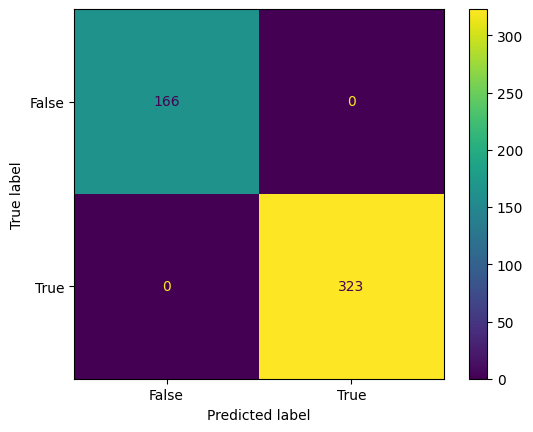

In [197]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, y_hat_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

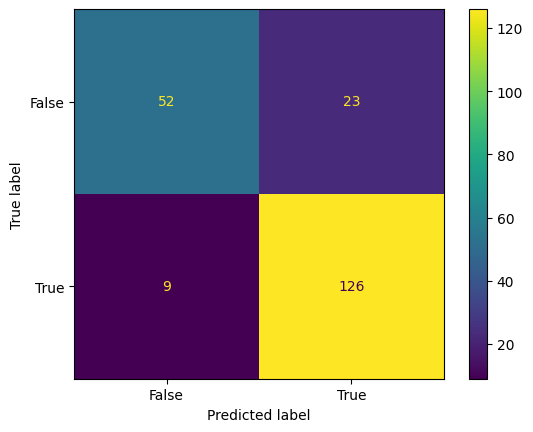

In [198]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_hat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()